<a href="https://colab.research.google.com/github/flaghunter21/DFS/blob/main/Nascar_Combinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding all DK NAS Lineup Combinations

In [70]:
import pandas as pd
import itertools
import numpy as np

In [34]:
nas_df = pd.read_csv('nas.csv')
nas_df.columns

Index(['Player', 'Inj', 'Likes', 'Salary', 'Start #', 'Odds', 'Top 3', 'Top 5',
       'Avg', 'STDV', 'Rating', 'Floor', 'Ceiling', 'Own', 'FC Proj',
       'My Proj', 'Exp.', 'Used', 'Con.', 'Value', 'Actual Finish', 'Own%',
       'Actual Score', 'Val'],
      dtype='object')

In [35]:
nas_df = nas_df.loc[:, ['Player','Salary', 'My Proj', 'Own%', 'Actual Score']]
nas_df['Own%'] = nas_df['Own%'].str.replace('%','').astype(float)
nas_df.head()

,Player,Salary,My Proj,Own%,Actual Score
0,Chase Briscoe,7800,37.89,37.92,4.9
1,Austin Cindric,6800,36.97,18.70,31.3
2,Christopher Bell,9200,42.41,11.98,34.4
3,Tyler Reddick,9400,42.41,13.86,16.8
4,Ryan Blaney,9600,49.48,37.25,61.1


We use `itertools.combinations` to find all possible lineup combinations.

In [36]:
combos = list(itertools.combinations(nas_df['Player'], 6))
print(combos[:5])
print(len(combos))

[('Chase Briscoe', 'Austin Cindric', 'Christopher Bell', 'Tyler Reddick', 'Ryan Blaney', 'Denny Hamlin'), ('Chase Briscoe', 'Austin Cindric', 'Christopher Bell', 'Tyler Reddick', 'Ryan Blaney', 'Joey Logano'), ('Chase Briscoe', 'Austin Cindric', 'Christopher Bell', 'Tyler Reddick', 'Ryan Blaney', 'Aric Almirola'), ('Chase Briscoe', 'Austin Cindric', 'Christopher Bell', 'Tyler Reddick', 'Ryan Blaney', 'Harrison Burton'), ('Chase Briscoe', 'Austin Cindric', 'Christopher Bell', 'Tyler Reddick', 'Ryan Blaney', 'Ross Chastain')]
2324784


There are 2,324,784 possible lineup combinations (No Salary Cap Restrictions)

In [37]:
combos_df = pd.DataFrame(combos, columns=['D1','D2','D3','D4','D5','D6'])
combos_df.head()

,D1,D2,D3,D4,D5,D6
0,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Denny Hamlin
1,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Joey Logano
2,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Aric Almirola
3,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Harrison Burton
4,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Ross Chastain


In [38]:
projection_map = dict(zip(nas_df['Player'], nas_df['My Proj']))
ownership_map = dict(zip(nas_df['Player'], nas_df['Own%']))
score_map = dict(zip(nas_df['Player'], nas_df['Actual Score']))
salary_map = dict(zip(nas_df['Player'], nas_df['Salary']))

In [39]:
proj_cols = []
own_cols = []
score_cols = []
salary_cols = []
for i in range(1,7):
  combos_df[f'D{i}_Proj'] = combos_df[f'D{i}'].map(projection_map)
  proj_cols.append(f'D{i}_Proj')
for i in range(1, 7):
  combos_df[f'D{i}_Own'] = combos_df[f'D{i}'].map(ownership_map)
  own_cols.append(f'D{i}_Own')
for i in range(1, 7):
  combos_df[f'D{i}_Score'] = combos_df[f'D{i}'].map(score_map)
  score_cols.append(f'D{i}_Score')
for i in range(1, 7):
  combos_df[f'D{i}_Salary'] = combos_df[f'D{i}'].map(salary_map)
  salary_cols.append(f'D{i}_Salary')

In [40]:
combos_df.head()

,D1,D2,D3,D4,D5,D6,D1_Proj,D2_Proj,D3_Proj,D4_Proj,...,D3_Score,D4_Score,D5_Score,D6_Score,D1_Salary,D2_Salary,D3_Salary,D4_Salary,D5_Salary,D6_Salary
0,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Denny Hamlin,37.89,36.97,42.41,42.41,...,34.4,16.8,61.1,-20.1,7800,6800,9200,9400,9600,10600
1,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Joey Logano,37.89,36.97,42.41,42.41,...,34.4,16.8,61.1,65.5,7800,6800,9200,9400,9600,8900
2,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Aric Almirola,37.89,36.97,42.41,42.41,...,34.4,16.8,61.1,43.8,7800,6800,9200,9400,9600,7000
3,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Harrison Burton,37.89,36.97,42.41,42.41,...,34.4,16.8,61.1,1.0,7800,6800,9200,9400,9600,5300
4,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Ross Chastain,37.89,36.97,42.41,42.41,...,34.4,16.8,61.1,45.2,7800,6800,9200,9400,9600,10000


In [41]:
combos_df['Total Proj'] = combos_df[proj_cols].sum(axis=1)
combos_df['Own Sum'] = combos_df[own_cols].sum(axis=1)
combos_df['Total Score'] = combos_df[score_cols].sum(axis=1)
combos_df['Salary Cap'] = combos_df[salary_cols].sum(axis=1)
combos_df.head()

,D1,D2,D3,D4,D5,D6,D1_Proj,D2_Proj,D3_Proj,D4_Proj,...,D1_Salary,D2_Salary,D3_Salary,D4_Salary,D5_Salary,D6_Salary,Total Proj,Own Sum,Total Score,Salary Cap
0,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Denny Hamlin,37.89,36.97,42.41,42.41,...,7800,6800,9200,9400,9600,10600,266.44,128.42,128.4,53400
1,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Joey Logano,37.89,36.97,42.41,42.41,...,7800,6800,9200,9400,9600,8900,263.81,161.36,214.0,51700
2,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Aric Almirola,37.89,36.97,42.41,42.41,...,7800,6800,9200,9400,9600,7000,240.15,133.67,192.3,49800
3,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Harrison Burton,37.89,36.97,42.41,42.41,...,7800,6800,9200,9400,9600,5300,228.19,124.81,149.5,48100
4,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Ross Chastain,37.89,36.97,42.41,42.41,...,7800,6800,9200,9400,9600,10000,253.07,148.59,193.7,52800


The salary cap on DraftKings is $50,000 so we will simply get rid of lineups that exceed this limit.

In [43]:
print(len(combos_df))
combos_df = combos_df[combos_df['Salary Cap'] <= 50000]
print(len(combos_df))
combos_df.head()

2324784
2002351


,D1,D2,D3,D4,D5,D6,D1_Proj,D2_Proj,D3_Proj,D4_Proj,...,D1_Salary,D2_Salary,D3_Salary,D4_Salary,D5_Salary,D6_Salary,Total Proj,Own Sum,Total Score,Salary Cap
2,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Aric Almirola,37.89,36.97,42.41,42.41,...,7800,6800,9200,9400,9600,7000,240.15,133.67,192.3,49800
3,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Harrison Burton,37.89,36.97,42.41,42.41,...,7800,6800,9200,9400,9600,5300,228.19,124.81,149.5,48100
8,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Cole Custer,37.89,36.97,42.41,42.41,...,7800,6800,9200,9400,9600,6300,228.73,126.17,146.5,49100
11,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Michael McDowell,37.89,36.97,42.41,42.41,...,7800,6800,9200,9400,9600,5600,223.30,127.15,182.8,48400
12,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Bubba Wallace Jr,37.89,36.97,42.41,42.41,...,7800,6800,9200,9400,9600,6700,231.45,130.86,156.5,49500


Our lineup combinations go from 2,324,784 to 2,002,351.

In [45]:
clean_combos = combos_df.loc[:, ['D1','D2','D3','D4','D5','D6','Total Proj','Own Sum','Total Score','Salary Cap']]
clean_combos.head()

,D1,D2,D3,D4,D5,D6,Total Proj,Own Sum,Total Score,Salary Cap
2,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Aric Almirola,240.15,133.67,192.3,49800
3,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Harrison Burton,228.19,124.81,149.5,48100
8,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Cole Custer,228.73,126.17,146.5,49100
11,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Michael McDowell,223.30,127.15,182.8,48400
12,Chase Briscoe,Austin Cindric,Christopher Bell,Tyler Reddick,Ryan Blaney,Bubba Wallace Jr,231.45,130.86,156.5,49500


In [46]:
clean_combos.to_csv('clean_combos.csv',index=False)

We can now analyze all possible combinations and the key metrics.

In [48]:
clean_combos.loc[:,['Total Proj','Own Sum','Total Score','Salary Cap']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Total Proj,Own Sum,Total Score,Salary Cap
count,2002351.00000,2002351.00000,2002351.00000,2002351.00000
mean,187.35560,93.80860,159.65990,43914.69268
std,34.94209,24.38070,53.00951,3611.47101
min,32.07000,9.79000,-38.10000,29100.00000
25%,164.04000,76.63000,123.00000,41400.00000
50%,189.92000,93.16000,159.20000,44200.00000
75%,213.28000,110.27000,195.90000,46800.00000
max,296.68000,204.96000,371.40000,50000.00000


From this we can see the following:
* The minimum salary used by a lineup was $29,100
* The minimum projection was only 32.07 points while the maximum was 296.68
* The minimum possible actual score was -38.1
* The maximum possible actual score was 371.4


In [77]:
clean_combos.loc[:,['Total Proj','Own Sum','Total Score','Salary Cap']].corr()

,Total Proj,Own Sum,Total Score,Salary Cap
Total Proj,1.000000,0.690989,0.379717,0.876094
Own Sum,0.690989,1.000000,0.388746,0.513758
Total Score,0.379717,0.388746,1.000000,0.297231
Salary Cap,0.876094,0.513758,0.297231,1.000000


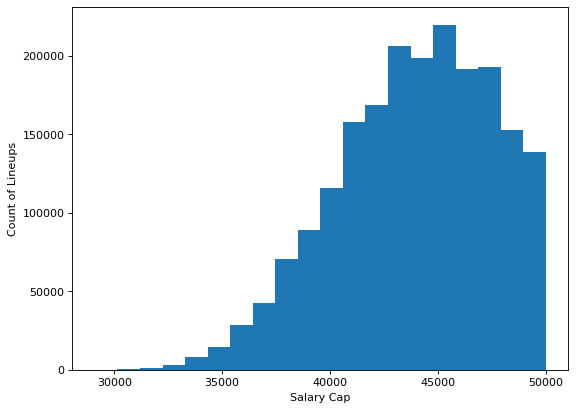

In [67]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.hist(clean_combos['Salary Cap'],bins=20)
plt.xlabel('Salary Cap')
plt.ylabel('Count of Lineups')
plt.show()

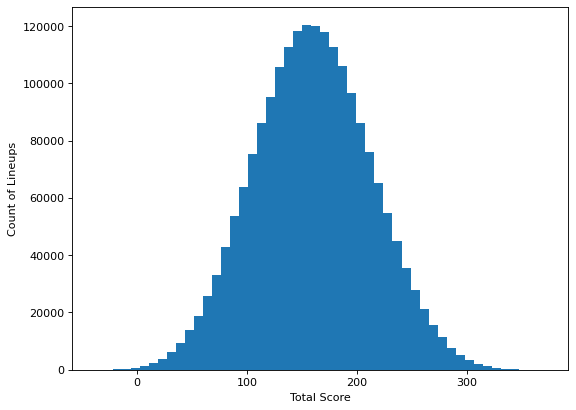

In [68]:
figure(figsize=(8, 6), dpi=80)
plt.hist(clean_combos['Total Score'],bins=50)
plt.xlabel('Total Score')
plt.ylabel('Count of Lineups')
plt.show()

The actual scores of the lineups follow a normal distribution.